<a href="https://colab.research.google.com/github/George7531/for_machine_learning/blob/main/ml/Learnings/deep_learning_tool_kits/Deep_RL/policy_gradient_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# day 375

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/thumbnail.png)

* In deep q-learing, a value-based deep reinforcement learning algorithm, we used a deep neural network to approximate the different Q-values for each possible action at a state.


![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit3/link-value-policy.jpg)

* In value-based methods, the policy (π) only exists because of the action value estimates since the policy is just a function (for instance, greedy-policy) that will select the action with the highest value given a state.

* With policy-based methods, we want to optimize the policy directly without having an intermediate step of learning a value function.

* So now, we’ll learn about policy-based methods and study a subset of these methods called policy gradient. Then we’ll implement our first policy gradient algorithm called Monte Carlo Reinforcement algorithm from scratch using PyTorch. Then, we’ll test its robustness using the CartPole-v1 and PixelCopter environments.

## what are policy based methods:
* The main goal of Reinforcement learning is to find the optimal policy $𝜋^∗$ that will maximize the expected cumulative reward. Because Reinforcement Learning is based on the reward hypothesis: all goals can be described as the maximization of the expected cumulative reward.

* For instance, in a soccer game (where you’re going to train the agents in two units), the goal is to win the game. We can describe this goal in reinforcement learning as maximizing the number of goals scored (when the ball crosses the goal line) into your opponent’s soccer goals. And minimizing the number of goals in your soccer goals.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/soccer.jpg)

# value-based, policy-based and actor critic method:
* In the first unit, we saw two methods to find (or, most of the time, approximate) this optimal policy $ 𝜋^∗ $.

* In value-based methods, we learn a value function.The idea is that an optimal value function leads to an optimal policy
$ 𝜋^∗ $ .
* Our objective is to minimize the loss between the predicted and target value to approximate the true action-value function.
* We have a policy, but it's implicit since it is generated directly from the value function. For instance, in Q-Learning, we used an (epsilon-)greedy policy.

* On the other hand, in policy-based methods, we directly learn to approximate
$ 𝜋^∗ $ without having to learn a value function.

* The idea is to parameterize the policy. For instance, using a neural network $ 𝜋_{\theta} $, this policy will output a probability distribution over actions (stochastic policy).

![sff](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/stochastic_policy.png)

* Our objective then is to maximize the performance of the parameterized policy using gradient ascent.
* To do that, we control the parameter 𝜃 that will affect the distribution of actions over a state.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_based.png)
* Next time, we'll study the actor-critic method, which is a combination of value-based and policy-based methods.


## Difference between Policy based method and Policy gradient method:

* Policy-gradient methods, what we’re going to study in this unit, is a subclass of policy-based methods. In policy-based methods, the optimization is most of the time on-policy since for each update, we only use data (trajectories) collected by our most recent version of $ 𝜋_{𝜃} $


* The difference between these two methods lies on how we optimize the parameter:

  1. In policy-based methods, we search directly for the optimal policy. We can optimize the parameter $ \theta $ indirectly by maximizing the local approximation of the objective function with techniques like hill climbing, simulated annealing, or evolution strategies.
  2. In policy-gradient methods, because it is a subclass of the policy-based methods, we search directly for the optimal policy. But we optimize the parameter 𝜃 directly by performing the gradient ascent on the performance of the objective function.
  

## Advantages and Disadvantages of policy gradient methods:
* Before diving more into how policy-gradient methods work (the objective function, policy gradient theorem, gradient ascent, etc.), let’s study the advantages and disadvantages of policy-based methods.

### Advantages:
1. The simplicity of integration: we can directly estimate the policy without storing the additional data(Action values).

2. Policy-gradient methods can learn a stochastic policy
Policy-gradient methods can learn a stochastic policy while value functions can’t.

  This has two consequences:

    1. we don’t need to implement an exploration/exploitation trade-off by hand. Since we output a probability distribution over actions, the agent explores the state space without always taking the same trajectory.

    2. We also get rid of the problem of perceptual aliasing. Perceptual aliasing is when two states seem (or are) the same but need different actions.

Let’s take an example: we have an intelligent vacuum cleaner whose goal is to suck the dust and avoid killing the hamsters.

![sfsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/hamster1.jpg)


* Our vacuum cleaner can only perceive where the walls are.

* The problem is that the two red (colored) states are aliased states(in one you have to move left to and another you have to right to), because the agent perceives an upper and lower wall for each.

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/hamster2.jpg)

* Under a deterministic policy, the policy will either always move right when in a red state or always move left. Either case will cause our agent to get stuck and never suck the dust. perhaps this may have caused our shooting space agent to move from enemies gunfire in an attempt to evade their attack to maximize the game score but never did it once shoot back at the enemies.

* Under a value-based Reinforcement learning algorithm, we learn a quasi-deterministic policy (“greedy epsilon strategy”). Consequently, our agent can spend a lot of time before finding the dust.

* On the other hand, an optimal stochastic policy will randomly move left or right in red (colored) states. Consequently, it will not be stuck and will reach the goal state with a high probability.

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/hamster3.jpg)


3. Policy-gradient methods are more effective in high-dimensional action spaces and continuous actions spaces:

  * The problem with Deep Q-learning is that their predictions assign a score (maximum expected future reward) for each possible action, at each time step, given the current state.

  * But what if we have an infinite possibility of actions?

  * for instance, with a self-driving car, at each state, you can have a (near) infinite choice of actions (turning the wheel at 15°, 17.2°, 19,4°, honking, etc.). We’ll need to output a Q-value for each possible action! And taking the max action of a continuous output is an optimization problem itself!

  * Instead, with policy-gradient methods, we output a probability distribution over actions.


4. Q value function aggressively chooses values that will not be very good in a continous action space where subtelity is required:

  * Policy-gradient methods have better convergence properties
  In value-based methods, we use an aggressive operator to change the value function: we take the maximum over Q-estimates. Consequently, the action probabilities may change dramatically for an arbitrarily small change in the estimated action values if that change results in a different action having the maximal value.

  * For instance, if during the training, the best action was left (with a Q-value of 0.22) and the training step after it’s right (since the right Q-value becomes 0.23), we dramatically changed the policy since now the policy will take most of the time right instead of left.

  * on the other hand, in policy-gradient methods, stochastic policy action preferences (probability of taking action) change smoothly over time.


### Disadvantages:
 Naturally, policy-gradient methods also have some disadvantages:

    * Frequently, policy-gradient methods converges to a local maximum instead of a global optimum.
    * Policy-gradient goes slower, step by step: it can take longer to train (inefficient).
    * Policy-gradient can have high variance. We’ll see in the actor-critic unit why, and how we can solve this problem.

  # monte carlo reinforce:
  * Monte Carlo Reinforce: A policy-gradient algorithm that uses an estimated return from an entire episode to update the policy parameter.


# Diving Deeper into policy gradient method:


## The big picture:
* We just learned that policy-gradient methods aim to find parameters 𝜃 that maximize the expected return.

* The idea is that we have a parameterized stochastic policy. In our case, a neural network outputs a probability distribution over actions. The probability of taking each action is also called the action preference.

If we take the example of CartPole-v1:

    * As input, we have a state.
    * As output, we have a probability distribution over actions at that state.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_based.png)

* Our goal with policy-gradient is to control the probability distribution of actions by tuning the policy such that good actions (that maximize the return) are sampled more frequently in the future. Each time the agent interacts with the environment, we tweak the parameters such that good actions will be sampled more likely in the future.

### But how are we going to optimize the weights using the expected return?

* The idea is that we’re going to let the agent interact during an episode. And if we win the episode, we consider that each action taken was good and must be more sampled in the future since they lead to win.

* So for each state-action pair, we want to increase the
P(a∣s): the probability of taking that action at that state. Or decrease if we lost.

* The Policy-gradient algorithm (simplified) looks like this:
![fsfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/pg_bigpicture.jpg)

* Now that we got the big picture, let’s dive deeper into policy-gradient methods.


## Diving Deeper into Policy Gradient Methods:
* We have our stochastic policy 𝜋 which has a parameter 𝜃.This π, given a state, outputs a probability distribution of actions.

![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/stochastic_policy.png)

* But how do we know if our policy is good? We need to have a way to measure it. To know that, we define a score/objective function called $ J(\theta)$ .


### The Objective Function:
* The objective function gives us the performance of the agent given a trajectory (state action sequence without considering reward (contrary to an episode)), and it outputs the expected cumulative reward.

![sfsddf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/objective.jpg)

* let's give some detail on this formula:
* The expected return (also called expected cumulative reward), is the weighted average (where the weights are given by P(τ:Θ) of all possible values that return R(τ) can take.

![sfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/expected_reward.png)

* R(τ) : Return from an arbitrary trajectory. To take this quantity and use it to calculate the expected return, we need to multiply it by the probability of each possible trajectory.

* P(τ;θ) : Probability of each possible trajectory τ (that probability depends on θ since it defines the policy that it uses to select the actions of the trajectory which has an impact of the states visited).

![ssfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/probability.png)

* J(θ) : Expected return, we calculate it by summing for all trajectories, the probability of taking that trajectory given θ multiplied by the return of this trajectory.

* Our objective then is to maximize the expected cumulative reward by finding the θ that will output the best action probability distributions

* θ will output the best action probability distributions.

![sfsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/max_objective.png)


### Gradient Ascent and Policy Gradient Theorem:

[To understand Gradient Descent and Gradient Ascent check this out!!!](https://www.baeldung.com/cs/gradient-descent-vs-ascent)


* Policy-gradient is an optimization problem: we want to find the values of θ that maximize our objective function
J(θ), so we need to use gradient-ascent. It’s the inverse of gradient-descent since it gives the direction of the steepest increase of J(θ).
* Our update step for gradient-ascent is:
$ θ←θ+α∗∇_{\theta}J(θ)$ We can repeatedly apply this update in the hopes that θ converges to the value that maximizes J(θ).

* However, there are two problems with computing the derivative of J(θ):

* We can’t calculate the true gradient of the objective function since it requires calculating the probability of each possible trajectory, which is computationally super expensive. So we want to calculate a gradient estimation with a sample-based estimate (collect some trajectories).

* We have another problem that I explain in the next optional section. To differentiate this objective function, we need to differentiate the state distribution, called the `Markov  Decision Process dynamics`. This is attached to the environment. It gives us the probability of the environment going into the next state, given the current state and the action taken by the agent. The problem is that we can’t differentiate it because we might not know about it.

![sfsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/probability.png)

* Fortunately we’re going to use a solution called the Policy Gradient Theorem that will help us to reformulate the objective function into a differentiable function that does not involve the differentiation of the state distribution.

* If you want to understand how we derive this formula for approximating the gradient, keep on reading. I will discuss it on the next cell.

## The Reinforce algorithm(Monte Carlo Reinforce):
* The Reinforce algorithm, also called Monte-Carlo policy-gradient, is a policy-gradient algorithm that uses an estimated return from an entire episode(Trajectory(tau)) to update the policy parameter θ:

* In a loop:

    1. Use the policy $π_θ$ to collect an episode τ

    2. Use the episode to estimate the gradient $\hat{g}=∇_θ J(θ)$

    ![sfs](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_gradient_one.png)

    3. Update the weights of the policy: $θ←θ+α*\hat{g}$


#### Explanation:
* $∇_{\theta}logπ_{\theta}(a_t|s_t)R(\tau) \Rightarrow $ is the direction of steepest increase of the (log) probability of selecting action $a_t$ from state $s_t$ . This tells us how we should change the weights of policy if we want to increase/decrease the log probability of selecting action $a_t$ from the state $s_t$

* R(τ): is the scoring function:
    1. If the return is high, it will push up the probabilities of the (state, action) combinations.
    2. Otherwise, if the return is low, it will push down the probabilities of the (state, action) combinations.


### Multiple Trajectories:
* We can also collect multiple episodes (trajectories) to estimate the gradient:
![fsf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/policy_gradient_multiple.png)
      
















# Policy Gradient Theorem(Extra deep explanation):

* we’re going to study how we differentiate the objective function that we will use to approximate the policy gradient.

1. The objective function:
![sfsdf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/expected_reward.png)

![fsdf](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/probability.png)








In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


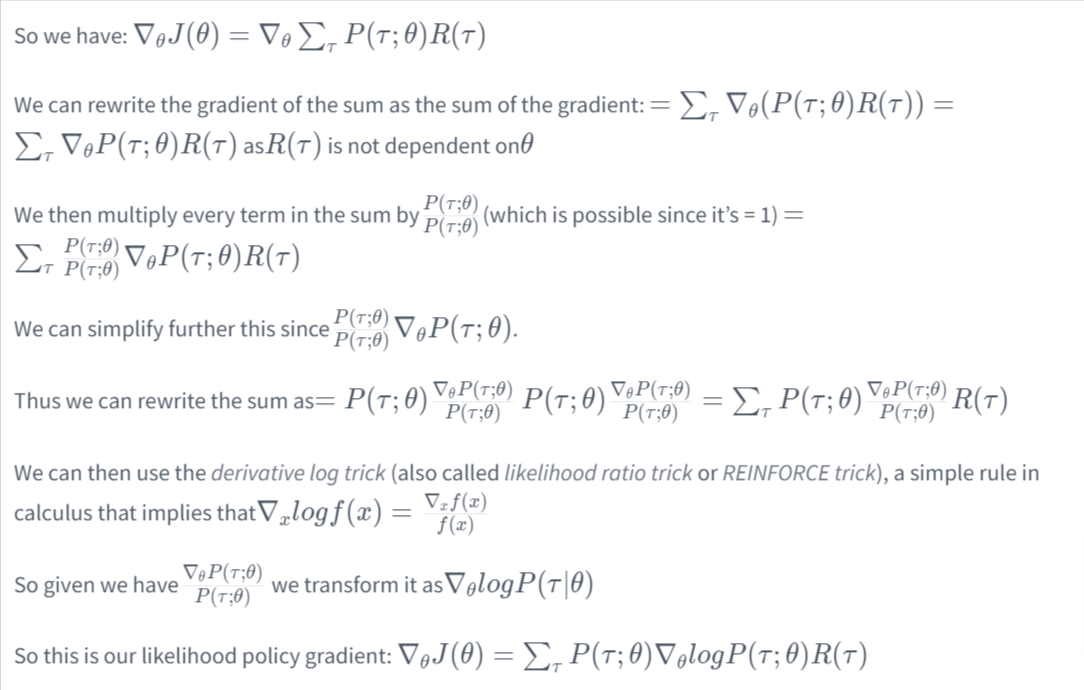

In [ ]:
from PIL import Image

Image.open('/content/drive/MyDrive/images/040624_rl.png')

 The last two parts of the derivation I'm having difficulty with are hence got help from claude 3:

1. We can simplify further this since $\frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta)$.

2. Thus we can rewrite the sum as $= P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} = \sum_\tau P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} R(\tau)$

## simplification:

1. The first part is a simplification step. In the previous line, they had:
   $\sum_\tau \frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta) R(\tau)$
   
   Notice that they have a fraction $\frac{P(\tau;\theta)}{P(\tau;\theta)}$. This fraction is always equal to 1 because any number divided by itself is 1 (as long as it's not 0, and probabilities can't be 0 in this context). So, they're pointing out that this term can be simplified:
   
   $\frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta) = 1 \times \nabla_\theta P(\tau; \theta) = \nabla_\theta P(\tau; \theta)$
   
   This makes the expression simpler without changing its value.

2. The second part is more complex. They're rewriting the expression in a clever way to introduce the term $\frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$. This term is known as the "score function" in statistics and is a key component in policy gradient methods in reinforcement learning.

   They start with $\nabla_\theta P(\tau; \theta)$ from the previous simplification. Then they multiply and divide by $P(\tau; \theta)$ to create this score function:
   
   $\nabla_\theta P(\tau; \theta) = \frac{P(\tau;\theta)}{P(\tau;\theta)} \nabla_\theta P(\tau; \theta) = P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$
   
   This is a valid operation because, again, $\frac{P(\tau;\theta)}{P(\tau;\theta)} = 1$, so we're not changing the value. But now we have the score function $\frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$ which has nice properties in policy gradient methods.

   Applying this to each term in the sum:
   $\sum_\tau P(\tau; \theta) \frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)} R(\tau)$
   
   This form is particularly useful because:
   1. $P(\tau; \theta)$ can be seen as the probability of sampling the trajectory $\tau$ under the current policy.
   2. $\frac{\nabla_\theta P(\tau;\theta)}{P(\tau;\theta)}$ is the score function, which tells us how to adjust our policy parameters to make this trajectory more or less likely.
   3. $R(\tau)$ is the reward of this trajectory, which tells us whether we want to make this trajectory more likely (if reward is high) or less likely (if reward is low).

* they're rewriting the expression to introduce the score function, which is a key concept in policy gradient methods. This form makes it clearer how to update the policy: increase the probability of high-reward trajectories and decrease the probability of low-reward trajectories.

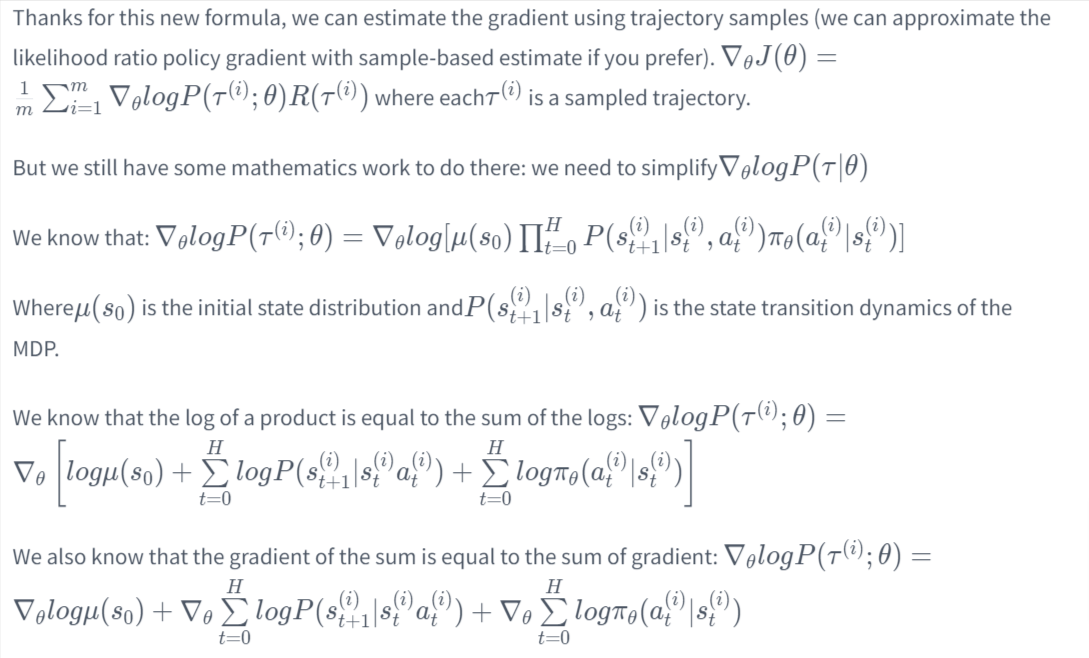

In [ ]:
Image.open('/content/drive/MyDrive/images/040624_rl1.png')

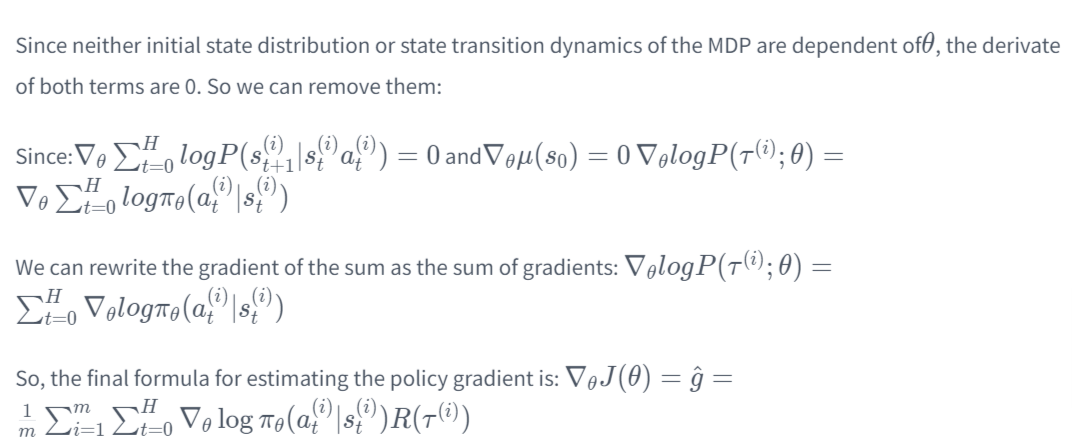

In [ ]:
Image.open('/content/drive/MyDrive/images/040624_rl2.png')

# Code:

* let's create a reinforce agent with pytorch!!!


![sfsdfsd](https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/envs.gif)


* Reinforce is a Policy-based method: a Deep Reinforcement Learning algorithm that tries to optimize the policy directly without using an action-value function.

* More precisely, Reinforce is a Policy-gradient method, a subclass of Policy-based methods that aims to optimize the policy directly by estimating the weights of the optimal policy using gradient ascent.

* To test its robustness, we're going to train it in 2 different simple environments:

1. Cartpole-v1
2. PixelcopterEnv

In [ ]:
# create a virtual screen
%%capture
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip install pyvirtualdisplay
!pip install pyglet==1.5.1

In [ ]:
# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

## Install the dependencies 🔽
The first step is to install the dependencies. We’ll install multiple ones:

- `gym`
- `gym-games`: Extra gym environments made with PyGame.
- `huggingface_hub`: 🤗 works as a central place where anyone can share and explore models and datasets. It has versioning, metrics, visualizations, and other features that will allow you to easily collaborate with others.

In [ ]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit4/requirements-unit4.txt

  Cloning https://github.com/ntasfi/PyGame-Learning-Environment.git to /tmp/pip-req-build-738x_zu6
  Running command git clone --filter=blob:none --quiet https://github.com/ntasfi/PyGame-Learning-Environment.git /tmp/pip-req-build-738x_zu6
  Resolved https://github.com/ntasfi/PyGame-Learning-Environment.git to commit 3dbe79dc0c35559bb441b9359948aabf9bb3d331
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/simoninithomas/gym-games to /tmp/pip-req-build-zv3lv0dq
  Running command git clone --filter=blob:none --quiet https://github.com/simoninithomas/gym-games /tmp/pip-req-build-zv3lv0dq
  Resolved https://github.com/simoninithomas/gym-games to commit f31695e4ba028400628dc054ee8a436f28193f0b
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 10.5 MB/s eta 0:00:00
  Created wheel for ple: filename=ple-0.0.1-py3-none-any.whl size=50769 sha256=7e91fb7da9efa6c42b4b272733ab46452588f7e13ecbc1d51bbc35aad98df980
  Stored in d

## Import the packages 📦
In addition to import the installed libraries, we also import:

- `imageio`: A library that will help us to generate a replay video



In [ ]:
import numpy as np

from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

# Gym
import gym
import gym_pygame

# Hugging Face Hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.
import imageio

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

We're now ready to implement our Reinforce algorithm 🔥

# First agent: Playing CartPole-v1 🤖

## Create the CartPole environment and understand how it works
### [The environment 🎮](https://www.gymlibrary.dev/environments/classic_control/cart_pole/)


### Why do we use a simple environment like CartPole-v1?
As explained in [Reinforcement Learning Tips and Tricks](https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html), when you implement your agent from scratch you need **to be sure that it works correctly and find bugs with easy environments before going deeper**. Since finding bugs will be much easier in simple environments.


> Try to have some “sign of life” on toy problems


> Validate the implementation by making it run on harder and harder envs (you can compare results against the RL zoo). You usually need to run hyperparameter optimization for that step.
___
### The CartPole-v1 environment

> A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum is placed upright on the cart and the goal is to balance the pole by applying forces in the left and right direction on the cart.



So, we start with CartPole-v1. The goal is to push the cart left or right **so that the pole stays in the equilibrium.**

The episode ends if:
- The pole Angle is greater than ±12°
- Cart Position is greater than ±2.4
- Episode length is greater than 500

We get a reward 💰 of +1 every timestep the Pole stays in the equilibrium.

In [ ]:
env_id = 'CartPole-v1'

# create the environment
env = gym.make(env_id,new_step_api=True)

# create the evaluation environment
eval_env = gym.make(env_id,new_step_api=True)

# get the size of observation_space and action_space
size_of_action_space = env.action_space.n
size_of_observation_space = env.observation_space.shape

In [ ]:
print('shape of observation space: {}'.format(size_of_observation_space))
print('sample observation: {}'.format(env.observation_space.sample())) # a random observation it displays
print('shape of action space: {}'.format(size_of_action_space))
print('sample action: {}'.format(env.action_space.sample())) # a random action is chosen and displayed.


shape of observation space: (4,)
sample observation: [-1.2597905e+00  3.1652682e+38 -1.8979555e-01 -1.8292137e+38]
shape of action space: 2
sample action: 1


## Let's build the Reinforce Architecture
This implementation is based on two implementations:
- [PyTorch official Reinforcement Learning example](https://github.com/pytorch/examples/blob/main/reinforcement_learning/reinforce.py)
- [Udacity Reinforce](https://github.com/udacity/deep-reinforcement-learning/blob/master/reinforce/REINFORCE.ipynb)
- [Improvement of the integration by Chris1nexus](https://github.com/huggingface/deep-rl-class/pull/95)

<img src="https://huggingface.co/datasets/huggingface-deep-rl-course/course-images/resolve/main/en/unit6/reinforce.png" alt="Reinforce"/>

In [ ]:
torch.nn.Linear(3,3)

Linear(in_features=3, out_features=3, bias=True)

In [ ]:
np.finfo(np.float32).eps.item()

1.1920928955078125e-07